In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

C:\Users\Parkjunhan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/GC/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [3]:
# 데이터 확인
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [4]:
# 컬렴명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Outcome')

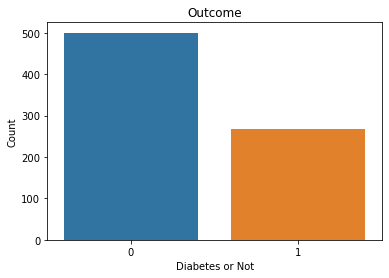

In [8]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [10]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\Parkjunhan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Parkjunhan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

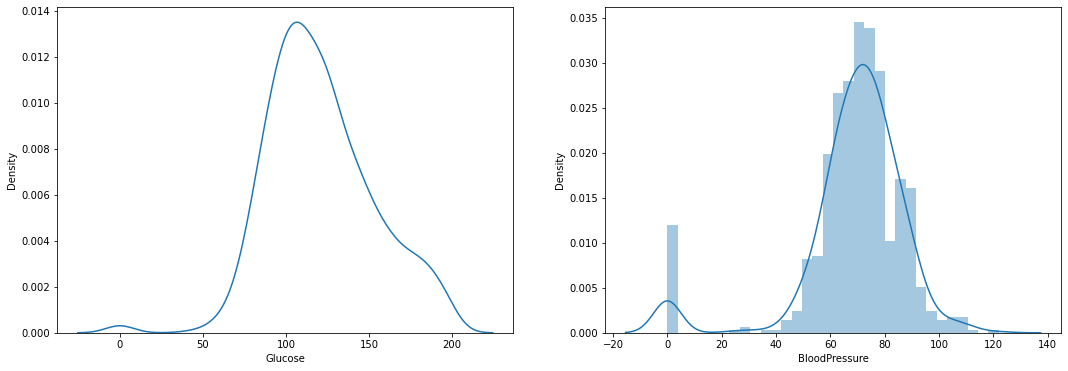

In [14]:
# 컬럼별 히스토그램 확인
# 'Glucose'와'BloodPressure' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Glucose'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['BloodPressure'], ax=ax2)

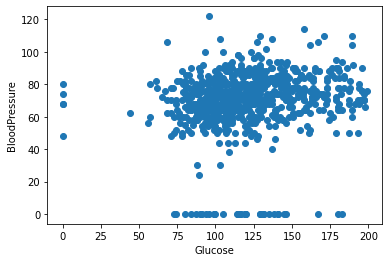

In [15]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Glucose'], df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

plt.show()

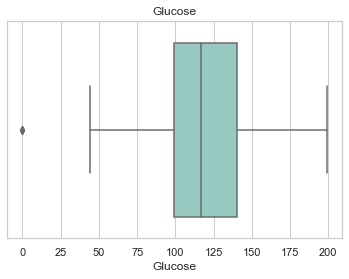

In [17]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Glucose", data=df, palette="Set3")
plt.title("Glucose")
plt.show()

C:\Users\Parkjunhan\AppData\Local\Temp\ipykernel_1728\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


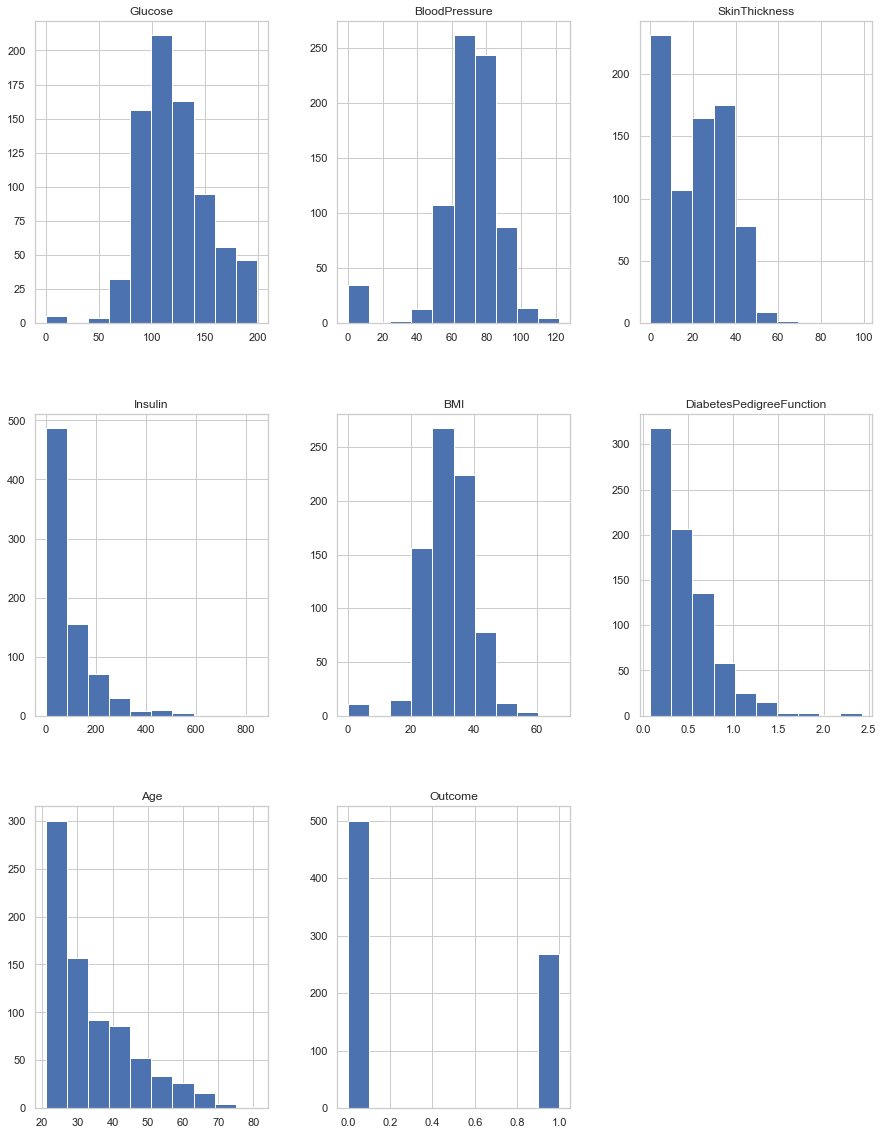

In [18]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [19]:
X=df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [20]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [21]:
y=df['Outcome']
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [22]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [25]:
#가장 중요한 코드 

from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm)) #예측값과 비교하는 코드
print(confusion_matrix(y_test, pred_svm)) 
# accuracy에 대해 알아두기
# confusion_matrix에 대해 알아두기.
# 45는 0인걸로 예측했는데 0인것, 8은 1인줄 알았는데 0인것. 1은 1인줄 알았는데 0인것, 89는 1인줄 알았는데 1인것. 따라서 45,89가 중요함


--- SVM Classifier ---
0.78125
[[119  11]
 [ 31  31]]


In [26]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7916666666666666
[[116  14]
 [ 26  36]]


C:\Users\Parkjunhan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.6875
[[111  19]
 [ 41  21]]


In [28]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7447916666666666
[[103  27]
 [ 22  40]]


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7760416666666666
[[114  16]
 [ 27  35]]
